In [1]:
import pickle
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from compress_pickle import dump, load

In [2]:
comments_df = pd.read_csv('files/compiled_comments_3_14_2021.csv')

In [3]:
def set_up_train_test_split(df, feature_list, target_name, test_size):
    X = df[feature_list]
    X = X.to_numpy()
    y = df[target_name]
    y = y.to_numpy()
    rand_state = random.randint(0, 1000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=rand_state)
    return X_train, X_test, y_train, y_test

def determine_accuracy(y_test, y_val):
    percent_arr = (y_test == y_val)
    count = np.count_nonzero(percent_arr)
    percentage = (count/(len(percent_arr)))*100
    return percentage

Percentage correct: 81.15234375



array([False,  True, False, ..., False,  True, False])

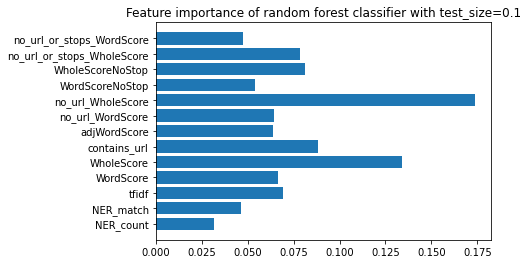

In [4]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier
def random_forest_class_func(df, feature_list, target_name, test_size, estimators):
    #set up training and testing split
    X_train, X_test, y_train, y_test = set_up_train_test_split(df, feature_list, target_name, test_size)
    
    #fit ridge classifier to x and y training set
    clf = RandomForestClassifier(n_estimators = estimators).fit(X_train, y_train)
    
    #pickle the model
    fname1 = "compressed_model.pkl"
    #dump(clf, fname1)
    dump(clf, fname1, compression="lzma", set_default_extension=False)
    
    importances = clf.feature_importances_
    
    #Predict with ridge classifier on x and y testing set
    y_val = clf.predict(X_test)
    
    #report the correct percentage of predictions
    percentage = determine_accuracy(y_test, y_val)
    
    #Send data to csv to keep track of data
    data = [[feature_list, test_size, percentage, estimators]]
    return_df = pd.DataFrame(data, columns = ['features', 'test size', 'percent correct', 'n_estimators'])
    return_df.to_csv('files/ML_Results/RandomForestClassifier_Results.csv', mode='a', header=False, index=False)
    
    print('Percentage correct: ' + str(percentage) + '\n')
    plt.barh(feature_list, importances)
    plt.title('Feature importance of random forest classifier with test_size=' + str(test_size))
    
    return y_val

features = ['NER_count', 'NER_match', 'tfidf', 'WordScore', 'WholeScore', 'contains_url', 'adjWordScore', 'no_url_WordScore', 'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop', 'no_url_or_stops_WholeScore', 'no_url_or_stops_WordScore']
test = random_forest_class_func(comments_df, features, 'action', 0.1, 1000)
test

In [5]:
#To load the model, run the following
import pickle
from compress_pickle import dump, load
model = load("compressed_model.pkl", compression="lzma", set_default_extension=False)

#Then do whatever you need to with the model variable

FileNotFoundError: [Errno 2] No such file or directory: 'compressed_model.pkl'

In [6]:
#Double checking that the model variable still works. It does
features = ['NER_count', 'NER_match', 'tfidf', 'WordScore', 'WholeScore', 'contains_url', 'adjWordScore', 'no_url_WordScore', 'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop', 'no_url_or_stops_WholeScore', 'no_url_or_stops_WordScore']
X_train, X_test, y_train, y_test = set_up_train_test_split(comments_df, features, 'action', 0.1)
model.predict(X_test)

NameError: name 'comments_df' is not defined